<a href="https://colab.research.google.com/github/ambikeshsingh/Normalization_and_Standraization/blob/main/Normalization_and_Standraization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Non_theft_df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/rule3_nontheft_training.xlsx')

In [5]:
Non_theft_df.head()

,S.No,DC_CODE,ACCT_ID,BILL_MONTH,BILL_MONTH2,BILL_TYPE,IS_GOVERNMENT,IS_EMPLOYEE,TARIFF_CODE,USAGE1,...,METER_READER_NAME_6,PENAL_CHRGE_6,ADJSTMNT_CHRGS_6,PREV_PDNG_AMNT_6,BILL_CRR_FLAG_6,MULT_FCTR_6,FIXED_CHARGES_6,CRNT_BILL_6,DUTY_6,Abnormality
0,276720,2323733,2581001197,MAY-2022,202205,AB,F,F,LV2.2,Shops/Showrooms,...,PMR_FILE,0.0,0.0,0.0,NO,1,138.0,923.0,83,Non_suspected
1,558269,2294318,2318012568,JUN-2022,202206,TMM,F,F,LV2.2,Shops/Showrooms,...,MANUAL,0.0,0.0,-4.0,NO,1,82.0,207.0,0,Non_suspected
2,166800,2424906,2902028399,APR-2022,202204,AB,F,F,LV2.2,Shops/Showrooms,...,FEDCO_SB,0.0,0.0,-3.0,NO,1,552.0,1731.0,136,Non_suspected
3,14427,2304202,2202010838,APR-2022,202204,TMM,F,F,LV2.2,Shops/Showrooms,...,PMR_FILE,0.0,200.0,6129.0,NO,1,1380.0,2818.0,145,Non_suspected
4,1017388,2574849,2162004089,JUL-2022,202207,TMM,F,F,LV2.2,Shops/Showrooms,...,PMR_FILE,0.0,0.0,4868.0,NO,1,552.0,1192.0,18,Non_suspected


In [6]:
Non_theft_df.shape

(7500, 105)

In [7]:
theft_df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/rule3_theft_training.xlsx")

In [8]:
theft_df.head()

,S.No,DC_CODE,ACCT_ID,BILL_MONTH,BILL_MONTH2,BILL_TYPE,IS_GOVERNMENT,IS_EMPLOYEE,TARIFF_CODE,USAGE1,...,METER_READER_NAME_6,PENAL_CHRGE_6,ADJSTMNT_CHRGS_6,PREV_PDNG_AMNT_6,BILL_CRR_FLAG_6,MULT_FCTR_6,FIXED_CHARGES_6,CRNT_BILL_6,DUTY_6,Abnormality
0,1,2414756,2019005267,MAY-2022,202205,AB,F,F,LV2.2,Shops/Showrooms,...,MANUAL,0.0,0.0,0.0,NO,1.0,67.0,304.0,20,3 month Additional Fix charge
1,2,2574328,2058000452,MAY-2022,202205,AB,F,F,LV2.2,Shops/Showrooms,...,PMR_FILE,0.0,0.0,0.0,NO,1.0,234.0,744.0,48,3 month Additional Fix charge
2,3,2304204,2244006061,APR-2022,202204,AB,F,F,LV5.1BT,Temporary Agriculture Pump,...,MANUAL,0.0,0.0,-13.0,NO,1.0,140.0,1041.0,0,3 month Additional Fix charge
3,4,2414661,2013003300,APR-2022,202204,AB,T,F,LV5.2A,Nurseries,...,MANUAL,0.0,0.0,3049.0,NO,1.0,350.0,5046.0,0,3 month Additional Fix charge
4,5,2304204,2244005996,MAY-2022,202205,AB,F,F,LV5.1BT,Temporary Agriculture Pump,...,MANUAL,91.0,200.0,-1.0,NO,1.0,511.0,2638.0,0,3 month Additional Fix charge


In [9]:
theft_df.shape

(6824, 105)

In [10]:
new_df=pd.concat((theft_df,Non_theft_df),ignore_index=True)

In [11]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_column",None)

In [12]:
new_df.shape

(14324, 105)

In [13]:
new_df.IS_EMPLOYEE.value_counts()

F    14324
Name: IS_EMPLOYEE, dtype: int64

In [14]:
new_df.IS_GOVERNMENT.value_counts()

F    10134
T     4190
Name: IS_GOVERNMENT, dtype: int64

In [15]:
new_df.shape

(14324, 105)

In [16]:
new_df.head()

,S.No,DC_CODE,ACCT_ID,BILL_MONTH,BILL_MONTH2,BILL_TYPE,IS_GOVERNMENT,IS_EMPLOYEE,TARIFF_CODE,USAGE1,CONNECTION_CATEGORY,PREMISE,METERING_STATUS,NET_METER,CTRCT_DMND_1,MAX_DMND_1,ESTIMATED_CONSUMTION_1,Total_CONS_1,POWER_FACTR_1,READING_TYPE_1,METER_READER_NAME_1,PENAL_CHRGE_1,ADJSTMNT_CHRGS_1,PREV_PDNG_AMNT_1,BILL_CRR_FLAG_1,MULT_FCTR_1,FIXED_CHARGES_1,CRNT_BILL_1,DUTY_1,CTRCT_DMND_2,MAX_DMND_2,ESTIMATED_CONSUMTION_2,Total_CONS_2,POWER_FACTR_2,READING_TYPE_2,METER_READER_NAME_2,PENAL_CHRGE_2,ADJSTMNT_CHRGS_2,PREV_PDNG_AMNT_2,BILL_CRR_FLAG_2,MULT_FCTR_2,FIXED_CHARGES_2,CRNT_BILL_2,DUTY_2,CTRCT_DMND_3,MAX_DMND_3,ESTIMATED_CONSUMTION_3,Total_CONS_3,POWER_FACTR_3,READING_TYPE_3,METER_READER_NAME_3,PENAL_CHRGE_3,ADJSTMNT_CHRGS_3,PREV_PDNG_AMNT_3,BILL_CRR_FLAG_3,MULT_FCTR_3,FIXED_CHARGES_3,CRNT_BILL_3,DUTY_3,CTRCT_DMND_4,MAX_DMND_4,ESTIMATED_CONSUMTION_4,Total_CONS_4,POWER_FACTR_4,READING_TYPE_4,METER_READER_NAME_4,PENAL_CHRGE_4,ADJSTMNT_CHRGS_4,PREV_PDNG_AMNT_4,BILL_CRR_FLAG_4,MULT_FCTR_4,FIXED_CHARGES_4,CRNT_BILL_4,DUTY_4,CTRCT_DMND_5,MAX_DMND_5,ESTIMATED_CONSUMTION_5,Total_CONS_5,POWER_FACTR_5,READING_TYPE_5,METER_READER_NAME_5,PENAL_CHRGE_5,ADJSTMNT_CHRGS_5,PREV_PDNG_AMNT_5,BILL_CRR_FLAG_5,MULT_FCTR_5,FIXED_CHARGES_5,CRNT_BILL_5,DUTY_5,CTRCT_DMND_6,MAX_DMND_6,ESTIMATED_CONSUMTION_6,Total_CONS_6,POWER_FACTR_6,READING_TYPE_6,METER_READER_NAME_6,PENAL_CHRGE_6,ADJSTMNT_CHRGS_6,PREV_PDNG_AMNT_6,BILL_CRR_FLAG_6,MULT_FCTR_6,FIXED_CHARGES_6,CRNT_BILL_6,DUTY_6,Abnormality
0,1,2414756,2019005267,MAY-2022,202205,AB,F,F,LV2.2,Shops/Showrooms,PERMANENT,RURAL,METERED,NO,1.240,2.000,0.0,95.0,0.80,NORMAL,PMR_FILE,152.10,0.0,0.0,NO,1.0,269.10,1100,88,1.240,2.000,0.0,97.0,0.80,NORMAL,PMR_FILE,152.1,0.0,0.0,NO,1.0,269.1,1123,91,1.240,2.2,0,29.0,0.80,NORMAL,PMR_FILE,87.1,0.0,0.0,NO,1.0,154.1,354.0,17,1.240,2.0,0,60.0,0.80,NORMAL,PMR_FILE,152.1,0.0,0.0,NO,1.0,269.1,787.0,47,1.240,1.0,0,30.0,0.80,NORMAL,MANUAL,0.0,0.0,0.0,NO,1.0,67.0,267.0,17,1.240,1.24,0,36.0,0.80,NORMAL,MANUAL,0.0,0.0,0.0,NO,1.0,67.0,304.0,20,3 month Additional Fix charge
1,2,2574328,2058000452,MAY-2022,202205,AB,F,F,LV2.2,Shops/Showrooms,PERMANENT,RURAL,METERED,NO,2.000,4.000,0.0,190.0,0.90,NORMAL,PMR_FILE,386.10,0.0,0.0,NO,1.0,620.10,2302,200,2.000,3.000,0.0,117.0,0.92,NORMAL,PMR_FILE,152.1,0.0,0.0,NO,1.0,386.1,1414,114,2.000,3.0,0,30.0,0.65,NORMAL,PMR_FILE,87.1,0.0,0.0,NO,1.0,221.1,421.0,17,2.000,1.0,0,31.0,0.80,NORMAL,MANUAL,0.0,0.0,0.0,NO,1.0,134.0,341.0,18,2.000,2.0,0,45.0,0.80,NORMAL,PMR_FILE,0.0,0.0,-6.0,NO,1.0,134.0,431.0,25,2.000,2.00,0,61.0,0.80,NORMAL,PMR_FILE,0.0,0.0,0.0,NO,1.0,234.0,744.0,48,3 month Additional Fix charge
2,3,2304204,2244006061,APR-2022,202204,AB,F,F,LV5.1BT,Temporary Agriculture Pump,TEMPORARY,URBAN,METERED,NO,1.492,2.112,0.0,228.0,0.80,NORMAL,PMR_FILE,91.00,0.0,-6.0,NO,1.0,231.00,563,0,1.492,2.100,0.0,172.0,0.81,NORMAL,PMR_FILE,91.0,0.0,-11.0,NO,1.0,231.0,476,0,1.492,2.1,0,84.0,0.81,NORMAL,MANUAL,91.0,1880.0,-1880.0,NO,1.0,231.0,2721.0,0,1.492,2.1,0,208.0,0.81,NORMAL,MANUAL,91.0,0.0,-17.0,NO,1.0,231.0,521.0,0,1.492,1.3,0,119.0,0.81,NORMAL,MANUAL,0.0,0.0,-16.0,NO,1.0,140.0,612.0,0,1.492,1.11,0,14.0,0.81,NORMAL,MANUAL,0.0,0.0,-13.0,NO,1.0,140.0,1041.0,0,3 month Additional Fix charge
3,4,2414661,2013003300,APR-2022,202204,AB,T,F,LV5.2A,Nurseries,PERMANENT,URBAN,METERED,NO,3.730,5.000,0.0,1727.0,0.87,NORMAL,PMR_FILE,91.00,0.0,7180.0,NO,1.0,511.00,10321,0,3.730,5.000,0.0,1094.0,0.82,NORMAL,PMR_FILE,91.0,0.0,7525.0,NO,1.0,511.0,6564,0,3.730,5.0,0,1155.0,0.80,NORMAL,MANUAL,91.0,0.0,7973.0,NO,1.0,511.0,6935.0,0,3.730,2.0,0,419.0,0.85,NORMAL,MANUAL,0.0,0.0,5339.0,NO,1.0,320.0,2504.0,0,3.730,3.0,0,852.0,0.85,NORMAL,MANUAL,0.0,0.0,5534.0,NO,1.0,350.0,4820.0,0,3.730,2.00,0,891.0,0.82,NORMAL,MANUAL,0.0,0.0,3049.0,NO,1.0,350.0,5046.0,0,3 month Additional Fix charge
4,5,2304204,2244005996,MAY-2022,202205,AB,F,F,LV5.1BT,Temporary Agriculture Pump,TEMPORARY,URBAN,METERED,NO,3.730,5.100,0.0,180.0,0.80,NORMAL,PMR_FILE,103.91,0.0,768.0,NO,1.0,583.51,622,0,3.730,5.112,0.

In [17]:
new_df=new_df[(new_df['IS_EMPLOYEE']=='F')]

In [18]:
new_df=new_df[(new_df['IS_GOVERNMENT']=='F')]

In [19]:
new_df.shape

(10134, 105)

In [20]:
new_df.IS_GOVERNMENT.value_counts()

F    10134
Name: IS_GOVERNMENT, dtype: int64

In [21]:
new_df.head()

,S.No,DC_CODE,ACCT_ID,BILL_MONTH,BILL_MONTH2,BILL_TYPE,IS_GOVERNMENT,IS_EMPLOYEE,TARIFF_CODE,USAGE1,CONNECTION_CATEGORY,PREMISE,METERING_STATUS,NET_METER,CTRCT_DMND_1,MAX_DMND_1,ESTIMATED_CONSUMTION_1,Total_CONS_1,POWER_FACTR_1,READING_TYPE_1,METER_READER_NAME_1,PENAL_CHRGE_1,ADJSTMNT_CHRGS_1,PREV_PDNG_AMNT_1,BILL_CRR_FLAG_1,MULT_FCTR_1,FIXED_CHARGES_1,CRNT_BILL_1,DUTY_1,CTRCT_DMND_2,MAX_DMND_2,ESTIMATED_CONSUMTION_2,Total_CONS_2,POWER_FACTR_2,READING_TYPE_2,METER_READER_NAME_2,PENAL_CHRGE_2,ADJSTMNT_CHRGS_2,PREV_PDNG_AMNT_2,BILL_CRR_FLAG_2,MULT_FCTR_2,FIXED_CHARGES_2,CRNT_BILL_2,DUTY_2,CTRCT_DMND_3,MAX_DMND_3,ESTIMATED_CONSUMTION_3,Total_CONS_3,POWER_FACTR_3,READING_TYPE_3,METER_READER_NAME_3,PENAL_CHRGE_3,ADJSTMNT_CHRGS_3,PREV_PDNG_AMNT_3,BILL_CRR_FLAG_3,MULT_FCTR_3,FIXED_CHARGES_3,CRNT_BILL_3,DUTY_3,CTRCT_DMND_4,MAX_DMND_4,ESTIMATED_CONSUMTION_4,Total_CONS_4,POWER_FACTR_4,READING_TYPE_4,METER_READER_NAME_4,PENAL_CHRGE_4,ADJSTMNT_CHRGS_4,PREV_PDNG_AMNT_4,BILL_CRR_FLAG_4,MULT_FCTR_4,FIXED_CHARGES_4,CRNT_BILL_4,DUTY_4,CTRCT_DMND_5,MAX_DMND_5,ESTIMATED_CONSUMTION_5,Total_CONS_5,POWER_FACTR_5,READING_TYPE_5,METER_READER_NAME_5,PENAL_CHRGE_5,ADJSTMNT_CHRGS_5,PREV_PDNG_AMNT_5,BILL_CRR_FLAG_5,MULT_FCTR_5,FIXED_CHARGES_5,CRNT_BILL_5,DUTY_5,CTRCT_DMND_6,MAX_DMND_6,ESTIMATED_CONSUMTION_6,Total_CONS_6,POWER_FACTR_6,READING_TYPE_6,METER_READER_NAME_6,PENAL_CHRGE_6,ADJSTMNT_CHRGS_6,PREV_PDNG_AMNT_6,BILL_CRR_FLAG_6,MULT_FCTR_6,FIXED_CHARGES_6,CRNT_BILL_6,DUTY_6,Abnormality
0,1,2414756,2019005267,MAY-2022,202205,AB,F,F,LV2.2,Shops/Showrooms,PERMANENT,RURAL,METERED,NO,1.240,2.000,0.0,95.0,0.80,NORMAL,PMR_FILE,152.10,0.0,0.0,NO,1.0,269.10,1100,88,1.240,2.000,0.0,97.0,0.80,NORMAL,PMR_FILE,152.1,0.0,0.0,NO,1.0,269.1,1123,91,1.240,2.2,0,29.0,0.80,NORMAL,PMR_FILE,87.1,0.0,0.0,NO,1.0,154.1,354.0,17,1.240,2.0,0,60.0,0.80,NORMAL,PMR_FILE,152.1,0.0,0.0,NO,1.0,269.1,787.0,47,1.240,1.0,0,30.0,0.80,NORMAL,MANUAL,0.0,0.0,0.0,NO,1.0,67.0,267.0,17,1.240,1.24,0,36.0,0.80,NORMAL,MANUAL,0.0,0.0,0.0,NO,1.0,67.0,304.0,20,3 month Additional Fix charge
1,2,2574328,2058000452,MAY-2022,202205,AB,F,F,LV2.2,Shops/Showrooms,PERMANENT,RURAL,METERED,NO,2.000,4.000,0.0,190.0,0.90,NORMAL,PMR_FILE,386.10,0.0,0.0,NO,1.0,620.10,2302,200,2.000,3.000,0.0,117.0,0.92,NORMAL,PMR_FILE,152.1,0.0,0.0,NO,1.0,386.1,1414,114,2.000,3.0,0,30.0,0.65,NORMAL,PMR_FILE,87.1,0.0,0.0,NO,1.0,221.1,421.0,17,2.000,1.0,0,31.0,0.80,NORMAL,MANUAL,0.0,0.0,0.0,NO,1.0,134.0,341.0,18,2.000,2.0,0,45.0,0.80,NORMAL,PMR_FILE,0.0,0.0,-6.0,NO,1.0,134.0,431.0,25,2.000,2.00,0,61.0,0.80,NORMAL,PMR_FILE,0.0,0.0,0.0,NO,1.0,234.0,744.0,48,3 month Additional Fix charge
2,3,2304204,2244006061,APR-2022,202204,AB,F,F,LV5.1BT,Temporary Agriculture Pump,TEMPORARY,URBAN,METERED,NO,1.492,2.112,0.0,228.0,0.80,NORMAL,PMR_FILE,91.00,0.0,-6.0,NO,1.0,231.00,563,0,1.492,2.100,0.0,172.0,0.81,NORMAL,PMR_FILE,91.0,0.0,-11.0,NO,1.0,231.0,476,0,1.492,2.1,0,84.0,0.81,NORMAL,MANUAL,91.0,1880.0,-1880.0,NO,1.0,231.0,2721.0,0,1.492,2.1,0,208.0,0.81,NORMAL,MANUAL,91.0,0.0,-17.0,NO,1.0,231.0,521.0,0,1.492,1.3,0,119.0,0.81,NORMAL,MANUAL,0.0,0.0,-16.0,NO,1.0,140.0,612.0,0,1.492,1.11,0,14.0,0.81,NORMAL,MANUAL,0.0,0.0,-13.0,NO,1.0,140.0,1041.0,0,3 month Additional Fix charge
4,5,2304204,2244005996,MAY-2022,202205,AB,F,F,LV5.1BT,Temporary Agriculture Pump,TEMPORARY,URBAN,METERED,NO,3.730,5.100,0.0,180.0,0.80,NORMAL,PMR_FILE,103.91,0.0,768.0,NO,1.0,583.51,622,0,3.730,5.112,0.0,293.0,0.80,NORMAL,PMR_FILE,91.0,0.0,-43.0,NO,1.0,511.0,768,0,3.730,5.1,0,1439.0,0.81,NORMAL,PMR_FILE,91.0,200.0,62.0,NO,1.0,511.0,3340.0,0,3.730,6.4,0,688.0,0.80,NORMAL,MANUAL,371.0,0.0,-3.0,NO,1.0,791.0,1865.0,0,3.730,5.1,0,1336.0,0.81,NORMAL,MANUAL,91.0,200.0,-63.0,NO,1.0,511.0,3127.0,0,3.730,5.10,0,1100.0,0.81,NORMAL,MANUAL,91.0,200.0,-1.0,NO,1.0,511.0,2638.0,0,3 month Additional Fix charge
6,7,2304204,2244006061,MAY-2022,202205,AB,F,F,LV5.1BT,Temporary Agriculture Pump,TEMPORARY,URBAN,METERED,NO,4.476,3.100,0.0,226.0,0.81,NORMAL,PMR_FILE,423.64,0.0,563.0,NO,1.0,583.51,9

In [22]:
new_df.PREMISE.value_counts()

URBAN    8727
RURAL    1407
Name: PREMISE, dtype: int64

In [23]:
new_df.NET_METER.value_counts()

NO     10101
YES       33
Name: NET_METER, dtype: int64

In [24]:
new_df=new_df[(new_df['NET_METER']=='NO')]


In [25]:
new_df.shape

(10101, 105)

In [26]:
new_df.READING_TYPE_3.value_counts()

NORMAL    9648
Name: READING_TYPE_3, dtype: int64

In [27]:
new_df=new_df.drop(columns='IS_EMPLOYEE')


In [28]:
new_df.METERING_STATUS.value_counts()

METERED    10101
Name: METERING_STATUS, dtype: int64

In [29]:
new_df=new_df.drop(columns='METERING_STATUS')


In [30]:
new_df=new_df.drop(columns='IS_GOVERNMENT')

In [31]:
new_df=new_df.drop(columns='NET_METER')

In [32]:
new_df=new_df.drop(new_df.filter(regex="READING_TYPE").columns,axis=1)

In [33]:
new_df=new_df.drop(new_df.filter(regex="BILL_CRR_FLAG").columns,axis=1)

In [34]:
new_df.shape

(10101, 89)

In [35]:

new_df.head()

,S.No,DC_CODE,ACCT_ID,BILL_MONTH,BILL_MONTH2,BILL_TYPE,TARIFF_CODE,USAGE1,CONNECTION_CATEGORY,PREMISE,CTRCT_DMND_1,MAX_DMND_1,ESTIMATED_CONSUMTION_1,Total_CONS_1,POWER_FACTR_1,METER_READER_NAME_1,PENAL_CHRGE_1,ADJSTMNT_CHRGS_1,PREV_PDNG_AMNT_1,MULT_FCTR_1,FIXED_CHARGES_1,CRNT_BILL_1,DUTY_1,CTRCT_DMND_2,MAX_DMND_2,ESTIMATED_CONSUMTION_2,Total_CONS_2,POWER_FACTR_2,METER_READER_NAME_2,PENAL_CHRGE_2,ADJSTMNT_CHRGS_2,PREV_PDNG_AMNT_2,MULT_FCTR_2,FIXED_CHARGES_2,CRNT_BILL_2,DUTY_2,CTRCT_DMND_3,MAX_DMND_3,ESTIMATED_CONSUMTION_3,Total_CONS_3,POWER_FACTR_3,METER_READER_NAME_3,PENAL_CHRGE_3,ADJSTMNT_CHRGS_3,PREV_PDNG_AMNT_3,MULT_FCTR_3,FIXED_CHARGES_3,CRNT_BILL_3,DUTY_3,CTRCT_DMND_4,MAX_DMND_4,ESTIMATED_CONSUMTION_4,Total_CONS_4,POWER_FACTR_4,METER_READER_NAME_4,PENAL_CHRGE_4,ADJSTMNT_CHRGS_4,PREV_PDNG_AMNT_4,MULT_FCTR_4,FIXED_CHARGES_4,CRNT_BILL_4,DUTY_4,CTRCT_DMND_5,MAX_DMND_5,ESTIMATED_CONSUMTION_5,Total_CONS_5,POWER_FACTR_5,METER_READER_NAME_5,PENAL_CHRGE_5,ADJSTMNT_CHRGS_5,PREV_PDNG_AMNT_5,MULT_FCTR_5,FIXED_CHARGES_5,CRNT_BILL_5,DUTY_5,CTRCT_DMND_6,MAX_DMND_6,ESTIMATED_CONSUMTION_6,Total_CONS_6,POWER_FACTR_6,METER_READER_NAME_6,PENAL_CHRGE_6,ADJSTMNT_CHRGS_6,PREV_PDNG_AMNT_6,MULT_FCTR_6,FIXED_CHARGES_6,CRNT_BILL_6,DUTY_6,Abnormality
0,1,2414756,2019005267,MAY-2022,202205,AB,LV2.2,Shops/Showrooms,PERMANENT,RURAL,1.240,2.000,0.0,95.0,0.80,PMR_FILE,152.10,0.0,0.0,1.0,269.10,1100,88,1.240,2.000,0.0,97.0,0.80,PMR_FILE,152.1,0.0,0.0,1.0,269.1,1123,91,1.240,2.2,0,29.0,0.80,PMR_FILE,87.1,0.0,0.0,1.0,154.1,354.0,17,1.240,2.0,0,60.0,0.80,PMR_FILE,152.1,0.0,0.0,1.0,269.1,787.0,47,1.240,1.0,0,30.0,0.80,MANUAL,0.0,0.0,0.0,1.0,67.0,267.0,17,1.240,1.24,0,36.0,0.80,MANUAL,0.0,0.0,0.0,1.0,67.0,304.0,20,3 month Additional Fix charge
1,2,2574328,2058000452,MAY-2022,202205,AB,LV2.2,Shops/Showrooms,PERMANENT,RURAL,2.000,4.000,0.0,190.0,0.90,PMR_FILE,386.10,0.0,0.0,1.0,620.10,2302,200,2.000,3.000,0.0,117.0,0.92,PMR_FILE,152.1,0.0,0.0,1.0,386.1,1414,114,2.000,3.0,0,30.0,0.65,PMR_FILE,87.1,0.0,0.0,1.0,221.1,421.0,17,2.000,1.0,0,31.0,0.80,MANUAL,0.0,0.0,0.0,1.0,134.0,341.0,18,2.000,2.0,0,45.0,0.80,PMR_FILE,0.0,0.0,-6.0,1.0,134.0,431.0,25,2.000,2.00,0,61.0,0.80,PMR_FILE,0.0,0.0,0.0,1.0,234.0,744.0,48,3 month Additional Fix charge
2,3,2304204,2244006061,APR-2022,202204,AB,LV5.1BT,Temporary Agriculture Pump,TEMPORARY,URBAN,1.492,2.112,0.0,228.0,0.80,PMR_FILE,91.00,0.0,-6.0,1.0,231.00,563,0,1.492,2.100,0.0,172.0,0.81,PMR_FILE,91.0,0.0,-11.0,1.0,231.0,476,0,1.492,2.1,0,84.0,0.81,MANUAL,91.0,1880.0,-1880.0,1.0,231.0,2721.0,0,1.492,2.1,0,208.0,0.81,MANUAL,91.0,0.0,-17.0,1.0,231.0,521.0,0,1.492,1.3,0,119.0,0.81,MANUAL,0.0,0.0,-16.0,1.0,140.0,612.0,0,1.492,1.11,0,14.0,0.81,MANUAL,0.0,0.0,-13.0,1.0,140.0,1041.0,0,3 month Additional Fix charge
4,5,2304204,2244005996,MAY-2022,202205,AB,LV5.1BT,Temporary Agriculture Pump,TEMPORARY,URBAN,3.730,5.100,0.0,180.0,0.80,PMR_FILE,103.91,0.0,768.0,1.0,583.51,622,0,3.730,5.112,0.0,293.0,0.80,PMR_FILE,91.0,0.0,-43.0,1.0,511.0,768,0,3.730,5.1,0,1439.0,0.81,PMR_FILE,91.0,200.0,62.0,1.0,511.0,3340.0,0,3.730,6.4,0,688.0,0.80,MANUAL,371.0,0.0,-3.0,1.0,791.0,1865.0,0,3.730,5.1,0,1336.0,0.81,MANUAL,91.0,200.0,-63.0,1.0,511.0,3127.0,0,3.730,5.10,0,1100.0,0.81,MANUAL,91.0,200.0,-1.0,1.0,511.0,2638.0,0,3 month Additional Fix charge
6,7,2304204,2244006061,MAY-2022,202205,AB,LV5.1BT,Temporary Agriculture Pump,TEMPORARY,URBAN,4.476,3.100,0.0,226.0,0.81,PMR_FILE,423.64,0.0,563.0,1.0,583.51,932,0,1.492,2.112,0.0,228.0,0.80,PMR_FILE,91.0,0.0,-6.0,1.0,231.0,563,0,1.492,2.1,0,172.0,0.81,PMR_FILE,91.0,0.0,-11.0,1.0,231.0,476.0,0,1.492,2.1,0,84.0,0.81,MANUAL,91.0,1880.0,-1880.0,1.0,231.0,2721.0,0,1.492,2.1,0,208.0,0.81,MANUAL,91.0,0.0,-17.0,1.0,231.0,521.0,0,1.492,1.30,0,119.0,0.81,MANUAL,0.0,0.0,-16.0,1.0,140.0,612.0,0,3 month Additional Fix charge


# Label Enconding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
new_df[['BILL_MONTH','BILL_TYPE','TARIFF_CODE','USAGE1','CONNECTION_CATEGORY','PREMISE',
        'METER_READER_NAME_1',
        'METER_READER_NAME_2','METER_READER_NAME_3',
        'METER_READER_NAME_4','METER_READER_NAME_5',
        'METER_READER_NAME_6','Abnormality']]=new_df[['BILL_MONTH','BILL_TYPE','TARIFF_CODE','USAGE1','CONNECTION_CATEGORY','PREMISE',
        'METER_READER_NAME_1',
        'METER_READER_NAME_2','METER_READER_NAME_3',
        'METER_READER_NAME_4','METER_READER_NAME_5',
        'METER_READER_NAME_6','Abnormality']].apply(LabelEncoder().fit_transform)

In [38]:
new_df.head()

,S.No,DC_CODE,ACCT_ID,BILL_MONTH,BILL_MONTH2,BILL_TYPE,TARIFF_CODE,USAGE1,CONNECTION_CATEGORY,PREMISE,CTRCT_DMND_1,MAX_DMND_1,ESTIMATED_CONSUMTION_1,Total_CONS_1,POWER_FACTR_1,METER_READER_NAME_1,PENAL_CHRGE_1,ADJSTMNT_CHRGS_1,PREV_PDNG_AMNT_1,MULT_FCTR_1,FIXED_CHARGES_1,CRNT_BILL_1,DUTY_1,CTRCT_DMND_2,MAX_DMND_2,ESTIMATED_CONSUMTION_2,Total_CONS_2,POWER_FACTR_2,METER_READER_NAME_2,PENAL_CHRGE_2,ADJSTMNT_CHRGS_2,PREV_PDNG_AMNT_2,MULT_FCTR_2,FIXED_CHARGES_2,CRNT_BILL_2,DUTY_2,CTRCT_DMND_3,MAX_DMND_3,ESTIMATED_CONSUMTION_3,Total_CONS_3,POWER_FACTR_3,METER_READER_NAME_3,PENAL_CHRGE_3,ADJSTMNT_CHRGS_3,PREV_PDNG_AMNT_3,MULT_FCTR_3,FIXED_CHARGES_3,CRNT_BILL_3,DUTY_3,CTRCT_DMND_4,MAX_DMND_4,ESTIMATED_CONSUMTION_4,Total_CONS_4,POWER_FACTR_4,METER_READER_NAME_4,PENAL_CHRGE_4,ADJSTMNT_CHRGS_4,PREV_PDNG_AMNT_4,MULT_FCTR_4,FIXED_CHARGES_4,CRNT_BILL_4,DUTY_4,CTRCT_DMND_5,MAX_DMND_5,ESTIMATED_CONSUMTION_5,Total_CONS_5,POWER_FACTR_5,METER_READER_NAME_5,PENAL_CHRGE_5,ADJSTMNT_CHRGS_5,PREV_PDNG_AMNT_5,MULT_FCTR_5,FIXED_CHARGES_5,CRNT_BILL_5,DUTY_5,CTRCT_DMND_6,MAX_DMND_6,ESTIMATED_CONSUMTION_6,Total_CONS_6,POWER_FACTR_6,METER_READER_NAME_6,PENAL_CHRGE_6,ADJSTMNT_CHRGS_6,PREV_PDNG_AMNT_6,MULT_FCTR_6,FIXED_CHARGES_6,CRNT_BILL_6,DUTY_6,Abnormality
0,1,2414756,2019005267,3,202205,0,1,53,0,0,1.240,2.000,0.0,95.0,0.80,2,152.10,0.0,0.0,1.0,269.10,1100,88,1.240,2.000,0.0,97.0,0.80,2,152.1,0.0,0.0,1.0,269.1,1123,91,1.240,2.2,0,29.0,0.80,2,87.1,0.0,0.0,1.0,154.1,354.0,17,1.240,2.0,0,60.0,0.80,3,152.1,0.0,0.0,1.0,269.1,787.0,47,1.240,1.0,0,30.0,0.80,2,0.0,0.0,0.0,1.0,67.0,267.0,17,1.240,1.24,0,36.0,0.80,2,0.0,0.0,0.0,1.0,67.0,304.0,20,0
1,2,2574328,2058000452,3,202205,0,1,53,0,0,2.000,4.000,0.0,190.0,0.90,2,386.10,0.0,0.0,1.0,620.10,2302,200,2.000,3.000,0.0,117.0,0.92,2,152.1,0.0,0.0,1.0,386.1,1414,114,2.000,3.0,0,30.0,0.65,2,87.1,0.0,0.0,1.0,221.1,421.0,17,2.000,1.0,0,31.0,0.80,2,0.0,0.0,0.0,1.0,134.0,341.0,18,2.000,2.0,0,45.0,0.80,3,0.0,0.0,-6.0,1.0,134.0,431.0,25,2.000,2.00,0,61.0,0.80,3,0.0,0.0,0.0,1.0,234.0,744.0,48,0
2,3,2304204,2244006061,0,202204,0,6,56,1,1,1.492,2.112,0.0,228.0,0.80,2,91.00,0.0,-6.0,1.0,231.00,563,0,1.492,2.100,0.0,172.0,0.81,2,91.0,0.0,-11.0,1.0,231.0,476,0,1.492,2.1,0,84.0,0.81,1,91.0,1880.0,-1880.0,1.0,231.0,2721.0,0,1.492,2.1,0,208.0,0.81,2,91.0,0.0,-17.0,1.0,231.0,521.0,0,1.492,1.3,0,119.0,0.81,2,0.0,0.0,-16.0,1.0,140.0,612.0,0,1.492,1.11,0,14.0,0.81,2,0.0,0.0,-13.0,1.0,140.0,1041.0,0,0
4,5,2304204,2244005996,3,202205,0,6,56,1,1,3.730,5.100,0.0,180.0,0.80,2,103.91,0.0,768.0,1.0,583.51,622,0,3.730,5.112,0.0,293.0,0.80,2,91.0,0.0,-43.0,1.0,511.0,768,0,3.730,5.1,0,1439.0,0.81,2,91.0,200.0,62.0,1.0,511.0,3340.0,0,3.730,6.4,0,688.0,0.80,2,371.0,0.0,-3.0,1.0,791.0,1865.0,0,3.730,5.1,0,1336.0,0.81,2,91.0,200.0,-63.0,1.0,511.0,3127.0,0,3.730,5.10,0,1100.0,0.81,2,91.0,200.0,-1.0,1.0,511.0,2638.0,0,0
6,7,2304204,2244006061,3,202205,0,6,56,1,1,4.476,3.100,0.0,226.0,0.81,2,423.64,0.0,563.0,1.0,583.51,932,0,1.492,2.112,0.0,228.0,0.80,2,91.0,0.0,-6.0,1.0,231.0,563,0,1.492,2.1,0,172.0,0.81,2,91.0,0.0,-11.0,1.0,231.0,476.0,0,1.492,2.1,0,84.0,0.81,2,91.0,1880.0,-1880.0,1.0,231.0,2721.0,0,1.492,2.1,0,208.0,0.81,2,91.0,0.0,-17.0,1.0,231.0,521.0,0,1.492,1.30,0,119.0,0.81,2,0.0,0.0,-16.0,1.0,140.0,612.0,0,0


In [39]:
new_df.TARIFF_CODE.value_counts()

1    9537
4     254
2      93
6      91
0      84
8      25
5      11
7       3
3       3
Name: TARIFF_CODE, dtype: int64

In [40]:
new_df.reset_index()

In [41]:
new_df.head()

In [ ]:
#We are looking the data is balanced or not.
import seaborn as sns
sns.countplot(x=new_df['Abnormality'])

In [ ]:
new_df['Abnormality'].value_counts()

In [ ]:
len(new_df)

##Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaling=MinMaxScaler()

In [ ]:
df_norm = pd.DataFrame(scaling.fit_transform(new_df), columns=new_df.columns)

In [ ]:
df_norm.head()

####Balancing Data

In [ ]:
df_norm.info()

In [ ]:
df_norm['Abnormality'].value_counts()

In [ ]:
df_norm.shape

In [ ]:
Y=df_norm.iloc[:,-1:]

In [ ]:
Y.value_counts()

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import collections
from imblearn.under_sampling import NearMiss 


In [ ]:
over=RandomOverSampler(sampling_strategy=.9)
x,y=over.fit_resample(df_norm,Y)

In [ ]:
print('Original dataset shape', len(Y))
print('Resample dataset shape', len(y))

In [ ]:
Y['Abnormality'].value_counts()

In [116]:
x.shape

(12382, 89)

In [ ]:
y.shape

In [ ]:
y['Abnormality'].value_counts()

In [ ]:
sns.countplot(x=y['Abnormality'])
print('Status after over sampling dataset')

In [ ]:

bal_df=x

In [ ]:
bal_df.head()

****Normalization****



In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaling=MinMaxScaler()

In [ ]:
# df_norm = pd.DataFrame(scaling.fit_transform(bal_df), columns=bal_df.columns)

In [ ]:
# df_norm.head()

**Standraization**

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# scaling=StandardScaler()

In [ ]:
# df_std=pd.DataFrame(scaling.fit_transform(bal_df),columns=bal_df.columns)

In [ ]:
# df_std.head()

In [ ]:
# df_std.shape

In [ ]:
# X=df_norm.iloc[:,3:]
# X.head()

In [ ]:
# Y=df_norm.iloc[:,-1:]
# Y.head()

In [ ]:
# X.shape

In [ ]:
# Y.shape

**Analyzing Feature Based on Variance**:

---



In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bal_df.var()

**Random Over Sampling (Balancing Unbalanced data)**

In [ ]:
# df_norm.info()

In [ ]:
# Y['Abnormality'].value_counts()  #1.0 for theft and 0.0 for non theft

In [ ]:
# Y.shape

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import collections
from imblearn.under_sampling import NearMiss

In [ ]:
# #define oversampling strategy
# over=RandomOverSampler(sampling_strategy=.9) 
# #.9 mean ,90% of data 
# x,y=over.fit_resample(df_norm,Y)

In [ ]:
#Define undersampling strategy
# under=RandomUnderSampler(sampling_strategy=.5)
# fit and apply the transform
# x,y=over.fit_resample(x,y)

In [ ]:
# #ros = RandomOverSampler(random_state=42)

# # fit predictor and target variable
# #x_ros, y_ros = ros.fit_resample(norm_df1, Y)

# print('Original dataset shape', len(Y))
# print('Resample dataset shape', len(x,y))

In [ ]:
#len(scaled_x_df1)
#len(x_norm_df1)
#len(x)

In [ ]:
# Y['Abnormility'].value_counts()

In [ ]:
# y['Abnormility'].value_counts()

In [ ]:
# sns.countplot(x= Y['Abnormility'])
# print("Status before over sampling dataset")

In [ ]:
# sns.countplot(x= y['Abnormility'])
# print("Status after over sampling dataset")

In [ ]:
bal_df.head()

### **Dimensionality Reduction (PCA) (Principal componant analysis)**



In [ ]:
df_norm_pca=bal_df.iloc[:,5:-1]

In [117]:
df_norm_pca.head()

,BILL_TYPE,TARIFF_CODE,USAGE1,CONNECTION_CATEGORY,PREMISE,CTRCT_DMND_1,MAX_DMND_1,ESTIMATED_CONSUMTION_1,Total_CONS_1,POWER_FACTR_1,METER_READER_NAME_1,PENAL_CHRGE_1,ADJSTMNT_CHRGS_1,PREV_PDNG_AMNT_1,MULT_FCTR_1,FIXED_CHARGES_1,CRNT_BILL_1,DUTY_1,CTRCT_DMND_2,MAX_DMND_2,ESTIMATED_CONSUMTION_2,Total_CONS_2,POWER_FACTR_2,METER_READER_NAME_2,PENAL_CHRGE_2,ADJSTMNT_CHRGS_2,PREV_PDNG_AMNT_2,MULT_FCTR_2,FIXED_CHARGES_2,CRNT_BILL_2,DUTY_2,CTRCT_DMND_3,MAX_DMND_3,ESTIMATED_CONSUMTION_3,Total_CONS_3,POWER_FACTR_3,METER_READER_NAME_3,PENAL_CHRGE_3,ADJSTMNT_CHRGS_3,PREV_PDNG_AMNT_3,MULT_FCTR_3,FIXED_CHARGES_3,CRNT_BILL_3,DUTY_3,CTRCT_DMND_4,MAX_DMND_4,ESTIMATED_CONSUMTION_4,Total_CONS_4,POWER_FACTR_4,METER_READER_NAME_4,PENAL_CHRGE_4,ADJSTMNT_CHRGS_4,PREV_PDNG_AMNT_4,MULT_FCTR_4,FIXED_CHARGES_4,CRNT_BILL_4,DUTY_4,CTRCT_DMND_5,MAX_DMND_5,ESTIMATED_CONSUMTION_5,Total_CONS_5,POWER_FACTR_5,METER_READER_NAME_5,PENAL_CHRGE_5,ADJSTMNT_CHRGS_5,PREV_PDNG_AMNT_5,MULT_FCTR_5,FIXED_CHARGES_5,CRNT_BILL_5,DUTY_5,CTRCT_DMND_6,MAX_DMND_6,ESTIMATED_CONSUMTION_6,Total_CONS_6,POWER_FACTR_6,METER_READER_NAME_6,PENAL_CHRGE_6,ADJSTMNT_CHRGS_6,PREV_PDNG_AMNT_6,MULT_FCTR_6,FIXED_CHARGES_6,CRNT_BILL_6,DUTY_6
0,0.0,0.125,0.883333,0.0,0.0,0.012643,0.009611,0.0,0.000991,0.798787,0.666667,0.001127,0.368221,0.045408,0.012658,0.001439,0.106464,0.000879,0.013767,0.009611,0.0,0.001012,0.783460,0.666667,0.001127,0.357037,0.068798,0.012658,0.001460,0.106492,0.000909,0.013767,0.012785,0.0,0.000302,0.800601,0.666667,0.000841,0.345539,0.071062,0.012658,0.000826,0.104574,0.00017,0.013767,0.004067,0.0,0.000963,0.800601,0.75,0.000537,0.353526,0.054727,0.012658,0.000763,0.143132,0.000722,0.013767,0.006331,0.0,0.000490,0.800601,0.50,0.000000,0.428117,0.051001,0.012658,0.000042,0.189603,0.000265,0.013767,0.008619,0.0,0.000761,0.800601,0.50,0.000000,0.594417,0.087297,0.012658,0.000213,0.187307,0.000413
1,0.0,0.125,0.883333,0.0,0.0,0.020398,0.019226,0.0,0.001982,0.899899,0.666667,0.002862,0.368221,0.045408,0.012658,0.003937,0.107942,0.001999,0.022211,0.014418,0.0,0.001220,0.914037,0.666667,0.001127,0.357037,0.068798,0.012658,0.002293,0.106850,0.001139,0.022211,0.017436,0.0,0.000313,0.650301,0.666667,0.000841,0.345539,0.071062,0.012658,0.001439,0.104657,0.00017,0.022211,0.002033,0.0,0.000498,0.800601,0.50,0.000000,0.353526,0.054727,0.012658,0.000293,0.142384,0.000276,0.022211,0.012668,0.0,0.000735,0.800601,0.75,0.000000,0.428117,0.050998,0.012658,0.000983,0.189863,0.000390,0.022211,0.013905,0.0,0.001290,0.800601,0.75,0.000000,0.594417,0.087297,0.012658,0.002301,0.188236,0.000990
2,0.0,0.750,0.933333,1.0,1.0,0.015214,0.010149,0.0,0.002378,0.798787,0.666667,0.000674,0.368221,0.045405,0.012658,0.001167,0.105803,0.000000,0.016567,0.010091,0.0,0.001794,0.794342,0.666667,0.000674,0.357037,0.068792,0.012658,0.001189,0.105696,0.000000,0.016567,0.012204,0.0,0.000876,0.810621,0.333333,0.000878,0.352926,0.070171,0.012658,0.001530,0.107489,0.00000,0.016567,0.004271,0.0,0.003339,0.810621,0.50,0.000321,0.353526,0.054719,0.012658,0.000630,0.142686,0.000000,0.016567,0.008232,0.0,0.001942,0.810621,0.50,0.000000,0.428117,0.050993,0.012658,0.001067,0.190150,0.000000,0.016567,0.007714,0.0,0.000296,0.810621,0.50,0.000000,0.594417,0.087290,0.012658,0.001126,0.188864,0.000000
3,0.0,0.750,0.933333,1.0,1.0,0.038051,0.024515,0.0,0.001877,0.798787,0.666667,0.000770,0.368221,0.045757,0.012658,0.003677,0.105875,0.000000,0.041434,0.024572,0.0,0.003056,0.783460,0.666667,0.000674,0.357037,0.068778,0.012658,0.003182,0.106055,0.000000,0.041434,0.029646,0.0,0.015009,0.810621,0.666667,0.000878,0.346325,0.071091,0.012658,0.004096,0.108252,0.00000,0.041434,0.013019,0.0,0.011044,0.800601,0.50,0.001309,0.353526,0.054726,0.012658,0.002580,0.144941,0.000000,0.041434,0.032313,0.0,0.021807,0.810621,0.50,0.001811,0.428828,0.050969,0.012658,0.006277,0.194136,0.000000,0.041434,0.035469,0.0,0.023254,0.810621,0.50,0.001214,0.595453,0.087296,0.012658,0.005765,0.192238,0.000000
4,0.0,0.750,0.933333,1.0,1.0,0.045664,0.014899,0.0,0.002

In [ ]:
df_norm_pca.shape

In [119]:
df_norm['Abnormality'].value_counts()

1.0    6517
0.0    3584
Name: Abnormality, dtype: int64

In [115]:
Y['Abnormality'].value_counts()

1.0    6517
0.0    3584
Name: Abnormality, dtype: int64

In [ ]:
from sklearn.decomposition import PCA

In [105]:
#applying pca
pca=PCA(50)           # u can give column number (ex.PCA(50)) , and looked the variance   
pca_values=pca.fit_transform(df_norm_pca)

In [106]:
#PCA Variance
var_ratio=pca.explained_variance_
var_ratio

array([4.43961110e-01, 1.25164587e-01, 8.78734112e-02, 4.53170629e-02,
       3.61339578e-02, 3.12064346e-02, 1.83744401e-02, 1.54307680e-02,
       1.26901383e-02, 1.06533166e-02, 9.28236314e-03, 8.09140102e-03,
       7.72197134e-03, 6.98207489e-03, 6.51950665e-03, 5.25692349e-03,
       5.17179476e-03, 4.48910314e-03, 4.22015681e-03, 3.50365095e-03,
       3.42700988e-03, 2.90943171e-03, 1.64451142e-03, 1.26448730e-03,
       1.10762867e-03, 9.09800171e-04, 7.56155952e-04, 5.49456341e-04,
       5.11130747e-04, 4.87153005e-04, 4.01947042e-04, 3.80658437e-04,
       3.68703111e-04, 3.55987966e-04, 3.21864836e-04, 3.13597524e-04,
       3.00393836e-04, 2.59805945e-04, 2.53597614e-04, 2.15853326e-04,
       1.85819143e-04, 1.75786164e-04, 1.67361584e-04, 1.57723329e-04,
       1.37183657e-04, 1.13069357e-04, 1.11113203e-04, 1.08377111e-04,
       6.75988138e-05, 5.29420835e-05])

In [107]:
import numpy as np
#Cumulative Variance ratio
cum_var=np.cumsum(np.round(var_ratio,4)*100)

In [108]:
 cum_var

array([44.4 , 56.92, 65.71, 70.24, 73.85, 76.97, 78.81, 80.35, 81.62,
       82.69, 83.62, 84.43, 85.2 , 85.9 , 86.55, 87.08, 87.6 , 88.05,
       88.47, 88.82, 89.16, 89.45, 89.61, 89.74, 89.85, 89.94, 90.02,
       90.07, 90.12, 90.17, 90.21, 90.25, 90.29, 90.33, 90.36, 90.39,
       90.42, 90.45, 90.48, 90.5 , 90.52, 90.54, 90.56, 90.58, 90.59,
       90.6 , 90.61, 90.62, 90.63, 90.64])

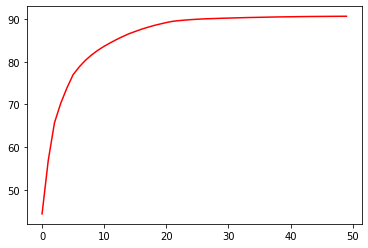

In [109]:
#Variation plot for PCA Componants obtain
import matplotlib.pyplot as plt
plt.plot(cum_var,color='red')

In [110]:
#Creating DATAFRAME for PC values
pca_df=pd.DataFrame(pca_values,columns=('pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17',
                                        'pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25','pc26','pc27','pc28','pc29','pc30','pc31','pc32','pc33','pc34','pc35'
                                        ,'pc36','pc37','pc38','pc39','pc40','pc41','pc42','pc43','pc44','pc45','pc46','pc47','pc48','pc49','pc50'))

In [111]:
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50
0,-0.150544,0.874748,0.051372,0.151745,-0.060298,0.044155,-0.042394,0.020640,-0.006857,0.118614,-0.001339,-0.012557,-0.020119,0.004641,-0.005798,0.012318,0.022129,0.001602,-0.004870,0.010923,0.009767,0.002756,-0.004680,0.002291,-0.003734,0.002877,0.001316,-0.000308,0.009818,-0.005821,-0.003303,-0.000432,0.000291,-0.000248,0.000347,-0.001312,0.001509,0.001608,0.000012,-0.000667,0.000903,-0.001284,-0.001506,0.001162,-0.001098,0.001567,-0.001604,-0.000558,0.001819,0.004877
1,-0.225390,0.865028,0.025752,0.032440,0.110036,-0.142310,-0.019434,-0.121602,-0.013795,-0.143265,0.109866,0.029940,-0.034538,-0.009742,-0.001199,0.082083,-0.055219,-0.096712,0.032973,0.065976,-0.146699,-0.000127,-0.007336,0.003540,-0.001890,0.001656,-0.000872,0.003062,0.002525,-0.005427,-0.001735,0.000019,-0.001119,-0.000241,0.001102,-0.004378,-0.002256,-0.000262,-0.002967,-0.000970,-0.000069,-0.001354,-0.000702,0.002462,0.001522,-0.001649,0.002317,-0.000181,0.001927,0.003986
2,0.040741,-0.143780,-0.103547,0.335593,-0.096583,0.031823,0.984026,-0.252463,-0.489620,0.008349,-0.115688,0.119907,-0.007861,0.003476,0.049209,-0.007206,-0.007230,0.001594,0.006529,0.129113,0.054227,-0.092556,0.004281,-0.002965,0.000445,0.001220,-0.002801,-0.000056,0.007858,-0.007645,-0.002020,0.000943,-0.003774,0.006184,0.003007,0.001346,0.002194,0.008481,0.001204,-0.003873,0.001307,-0.010802,0.002043,-0.006708,0.000002,-0.000723,0.004355,-0.001804,0.002298,0.001540
3,-0.060507,-0.133188,-0.119720,0.298131,-0.100940,0.175121,0.970898,-0.247693,-0.471452,0.027556,0.136829,0.000220,-0.024810,0.018570,-0.012467,-0.019596,-0.027465,0.002936,-0.007043,0.109581,0.055638,-0.106096,0.003871,-0.006918,0.006355,-0.005103,-0.000041,0.000390,-0.003858,0.001556,-0.000534,-0.001048,0.000312,0.001863,0.000277,0.000619,-0.000408,-0.001969,0.001350,0.003412,0.000295,0.004030,-0.001803,0.002025,-0.003856,-0.002656,0.000089,0.000303,-0.001372,-0.002406
4,-0.079238,-0.131910,-0.115801,0.320515,-0.137239,0.136812,0.972009,-0.242738,-0.468655,0.029127,0.139280,0.005347,-0.019647,0.012829,-0.013840,-0.012737,-0.019585,-0.005143,0.003397,0.120449,0.061258,-0.095281,0.003192,-0.002450,0.000970,0.000723,-0.006622,0.002686,0.015344,0.002949,-0.000380,0.009970,-0.002239,-0.003158,0.007294,0.022848,-0.002591,0.005451,0.003973,-0.001410,-0.000509,-0.006652,0.006603,-0.006464,-0.001376,0.004580,0.005128,0.006124,0.004576,-0.000578


In [112]:
final_df=pd.concat([pca_df,y],axis=1)

In [113]:
final_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,Abnormality
0,-0.150544,0.874748,0.051372,0.151745,-0.060298,0.044155,-0.042394,0.020640,-0.006857,0.118614,-0.001339,-0.012557,-0.020119,0.004641,-0.005798,0.012318,0.022129,0.001602,-0.004870,0.010923,0.009767,0.002756,-0.004680,0.002291,-0.003734,0.002877,0.001316,-0.000308,0.009818,-0.005821,-0.003303,-0.000432,0.000291,-0.000248,0.000347,-0.001312,0.001509,0.001608,0.000012,-0.000667,0.000903,-0.001284,-0.001506,0.001162,-0.001098,0.001567,-0.001604,-0.000558,0.001819,0.004877,0.0
1,-0.225390,0.865028,0.025752,0.032440,0.110036,-0.142310,-0.019434,-0.121602,-0.013795,-0.143265,0.109866,0.029940,-0.034538,-0.009742,-0.001199,0.082083,-0.055219,-0.096712,0.032973,0.065976,-0.146699,-0.000127,-0.007336,0.003540,-0.001890,0.001656,-0.000872,0.003062,0.002525,-0.005427,-0.001735,0.000019,-0.001119,-0.000241,0.001102,-0.004378,-0.002256,-0.000262,-0.002967,-0.000970,-0.000069,-0.001354,-0.000702,0.002462,0.001522,-0.001649,0.002317,-0.000181,0.001927,0.003986,0.0
2,0.040741,-0.143780,-0.103547,0.335593,-0.096583,0.031823,0.984026,-0.252463,-0.489620,0.008349,-0.115688,0.119907,-0.007861,0.003476,0.049209,-0.007206,-0.007230,0.001594,0.006529,0.129113,0.054227,-0.092556,0.004281,-0.002965,0.000445,0.001220,-0.002801,-0.000056,0.007858,-0.007645,-0.002020,0.000943,-0.003774,0.006184,0.003007,0.001346,0.002194,0.008481,0.001204,-0.003873,0.001307,-0.010802,0.002043,-0.006708,0.000002,-0.000723,0.004355,-0.001804,0.002298,0.001540,0.0
3,-0.060507,-0.133188,-0.119720,0.298131,-0.100940,0.175121,0.970898,-0.247693,-0.471452,0.027556,0.136829,0.000220,-0.024810,0.018570,-0.012467,-0.019596,-0.027465,0.002936,-0.007043,0.109581,0.055638,-0.106096,0.003871,-0.006918,0.006355,-0.005103,-0.000041,0.000390,-0.003858,0.001556,-0.000534,-0.001048,0.000312,0.001863,0.000277,0.000619,-0.000408,-0.001969,0.001350,0.003412,0.000295,0.004030,-0.001803,0.002025,-0.003856,-0.002656,0.000089,0.000303,-0.001372,-0.002406,0.0
4,-0.079238,-0.131910,-0.115801,0.320515,-0.137239,0.136812,0.972009,-0.242738,-0.468655,0.029127,0.139280,0.005347,-0.019647,0.012829,-0.013840,-0.012737,-0.019585,-0.005143,0.003397,0.120449,0.061258,-0.095281,0.003192,-0.002450,0.000970,0.000723,-0.006622,0.002686,0.015344,0.002949,-0.000380,0.009970,-0.002239,-0.003158,0.007294,0.022848,-0.002591,0.005451,0.003973,-0.001410,-0.000509,-0.006652,0.006603,-0.006464,-0.001376,0.004580,0.005128,0.006124,0.004576,-0.000578,0.0


In [114]:
final_df['Abnormality'].value_counts()

1.0    6517
0.0    5865
Name: Abnormality, dtype: int64

In [121]:
# #visualisation for PCA
# import seaborn as sns
# fig=plt.figure(figsize=(16,12))
# sns.scatterplot(data=final_df)

## **Spliting Data in Training and Testing**

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(pca_df,y,test_size=0.20,stratify=y)

In [125]:
y_train.value_counts()

Abnormality
1.0            5213
0.0            4692
dtype: int64

In [126]:
y_test.value_counts()

Abnormality
1.0            1304
0.0            1173
dtype: int64